# Sampling a GP on a Hyperbolic space

Let's draw some samples from a Gaussian process on a Hyperbolic space!

In [1]:
# !pip install backends==1.4.32 plum-dispatch==1.7.4  # temporary measure

In [2]:
# Import a backend.
import numpy as np
# Import the geometric_kernels backend.
import geometric_kernels
# # Import a space and an appropriate kernel.
from geometric_kernels.spaces.hyperbolic import Hyperbolic
from geometric_kernels.kernels.geometric_kernels import MaternKarhunenLoeveKernel
from geometric_kernels.kernels.feature_maps import random_phase_feature_map
# # import sampler
from geometric_kernels.sampling import sampler

INFO: Using numpy backend


In [3]:
import geomstats.visualization as visualization

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

Define a manifold and build some grid on it:

In [5]:
# Create a manifold (2-dimensional hyperboloid).
hyperboloid = Hyperbolic(dim=2)

In [6]:
s = np.linspace(-15, 15, 100)
xx, yy = np.meshgrid(s, s)
points = np.c_[xx.ravel(), yy.ravel()]
points = hyperboloid.from_coordinates(points, "intrinsic")

In [7]:
params, state = {}, {}
params["nu"] = 3.0/2.0
params["lengthscale"] = 0.5

Let's see what we've got. In this picture, the colors represent the depth.

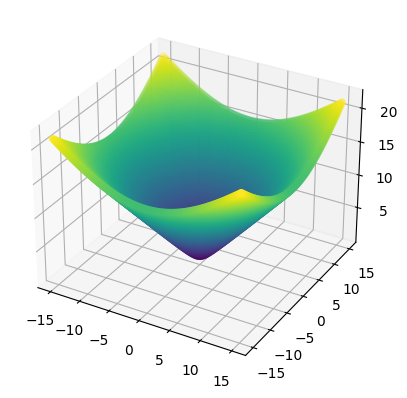

In [8]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
colors = points[:, 0]
ax.scatter(points[:, 2], points[:, 1], points[:, 0], c=colors, cmap='viridis')

In [9]:
# introduce random state for reproducibility (optional)
# `key` is jax's terminology
key = np.random.RandomState(seed=1234)

In [10]:
# compute feature map for this space
feature_map = random_phase_feature_map(hyperboloid, 100)

In [11]:
n_samples = 4
sample_paths = sampler(feature_map, s=n_samples)

Now, `sample_paths` is a *deterministic* function of `X`, if we provide the same key. It is not necessary, although recommended, to pass the key.

Let's actually evaluate the sample paths on our grid `points` and see what we've got:

In [12]:
key, samples = sample_paths(points, params, state, key=key)  # new random state is returned along with the samples

(array([3.000e+00, 0.000e+00, 1.100e+01, 1.560e+02, 9.681e+03, 1.340e+02,
        9.000e+00, 4.000e+00, 1.000e+00, 1.000e+00]),
 array([-132.72263393, -103.36041575,  -73.99819757,  -44.63597939,
         -15.27376121,   14.08845698,   43.45067516,   72.81289334,
         102.17511152,  131.5373297 ,  160.89954789]),
 <BarContainer object of 10 artists>)

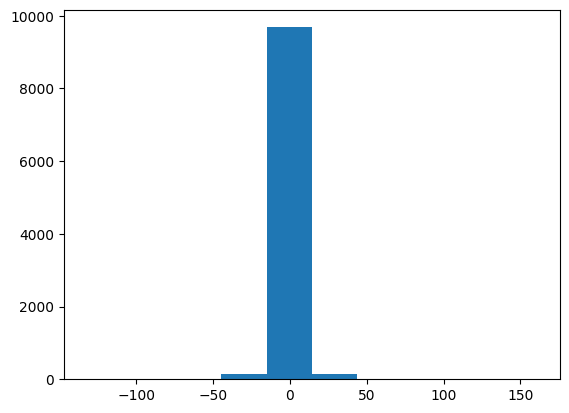

In [13]:
plt.hist(samples[:,0])  # need some normalization

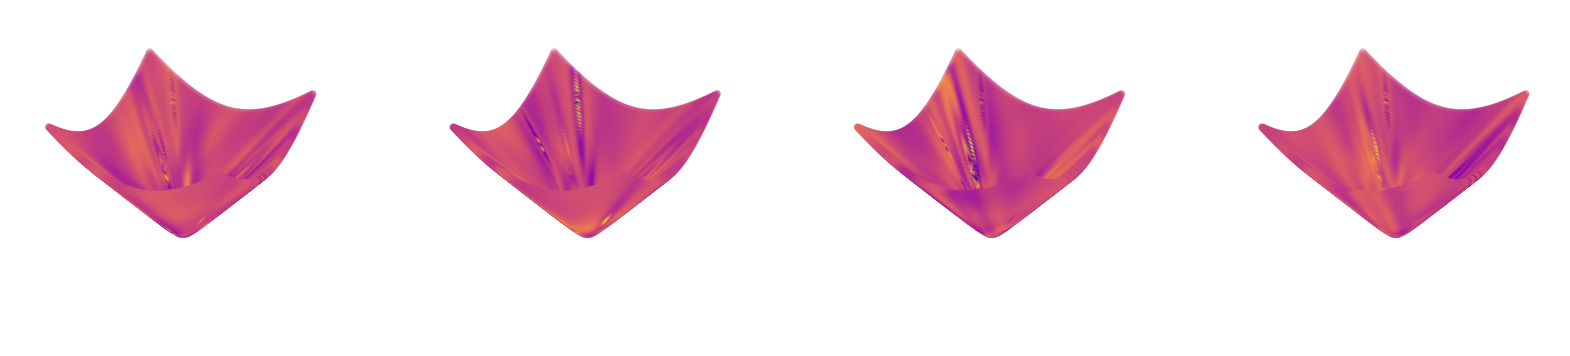

In [14]:
fig = plt.figure(figsize=(20,5))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, projection='3d')
    ax.scatter(points[:, 2], points[:, 1], points[:, 0], c=samples[:, i], cmap='plasma', vmin=-50, vmax=50)
    plt.axis('off')

In [15]:
points_on_disk = hyperboloid.change_coordinates_system(points, "extrinsic", "ball")

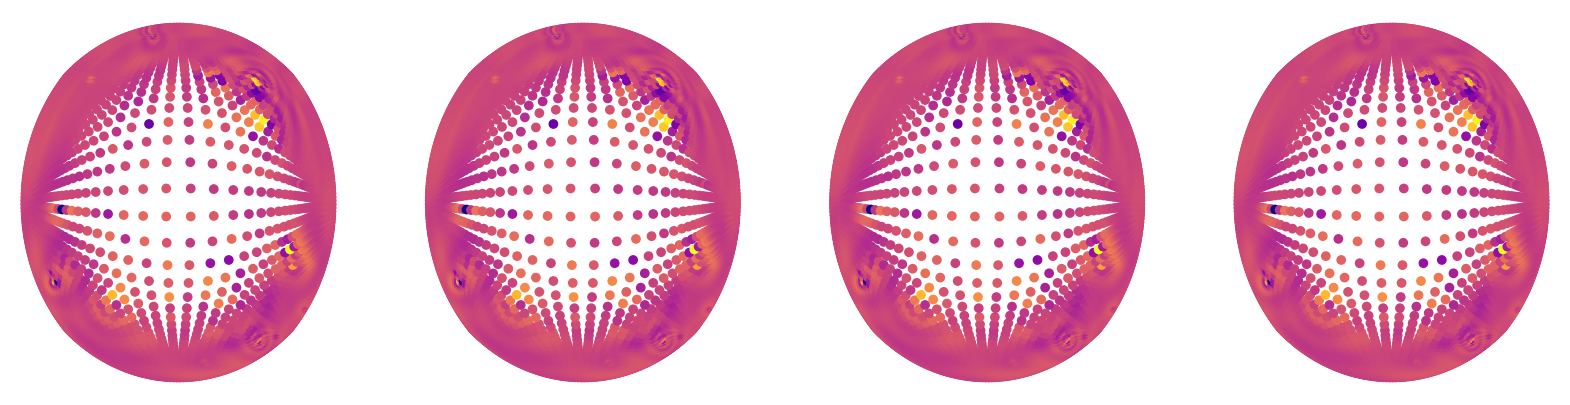

In [16]:
plt.figure(figsize=(20,5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.scatter(points_on_disk[:, 0], points_on_disk[:, 1], c=samples[:, 0], cmap='plasma', vmin=-100, vmax=100)
    plt.axis('off')